In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_json(filepath):
	with open(filepath, 'r') as file:
		data = json.load(file)
	
	return data

In [25]:
def convert_dict_to_list(input_dict):
	result = []
	for key, value in input_dict.items():
		a, b = key.split(':')
		tuple_key = (int(a), int(b))
		result.append((tuple_key, value))
	
	return result

In [26]:
def sort_list(input_list, index, descend=True):
		return sorted(input_list, key=lambda x: x[1][index], reverse=descend)

In [195]:
def extract_element_list(data_list, index):
    if index > 1:
        first_elements = [item[1][index - 2] for item in data_list]
    else:
        first_elements = [item[0][index] for item in data_list]
    return first_elements

In [196]:
def find_frontier(a_list, b_list):
		"""
		Filter elements from two lists based on the condition that an element 'bn' in b_list should not be greater
		than any subsequent element in b_list.

		Args:
		a_list (list): List of sorted elements [a1, a2, ..., an].
		b_list (list): Corresponding list [b1, b2, ..., bn].

		Returns:
		tuple: Two lists filtered according to the specified condition.
		"""
		filtered_a = []
		filtered_b = []
		
		for i in range(len(b_list)):
				if all(b_list[i] <= b_list[j] for j in range(i + 1, len(b_list))):
						filtered_a.append(a_list[i])
						filtered_b.append(b_list[i])
		
		return filtered_a, filtered_b

In [197]:
def plot_one_line(xs, ys, x_label, y_label, title, label_size=28, font_size=32):
	fig, ax1 = plt.subplots(figsize=(12, 6))

	ax1.plot(xs, ys, color='red', marker='o')  # 'o' denotes the marker type
	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	ax1.set_title(title, fontsize=font_size)
	ax1.tick_params(axis='both', labelsize=label_size)
	plt.grid(True)

	plt.show()

In [201]:
def plot_one_fitted_curve(xs, ys, x_label, y_label, title, label_size=28, font_size=32, legend_size=24):
    x = np.array(xs)
    y = np.array(ys)

    # Perform a polynomial fit of degree 2 (quadratic)
    coefficients = np.polyfit(x, y, 2)

    # Create a polynomial function from the coefficients
    polynomial = np.poly1d(coefficients)

    # Generate x values for plotting the curve
    x_fit = np.linspace(x.min(), x.max(), 50)

    # Evaluate the polynomial function for x_fit
    y_fit = polynomial(x_fit)

    plt.figure(figsize=(12, 8))
    plt.scatter(x, y, color='blue', label='Profiling Results')
    plt.plot(x_fit, y_fit, 'r-', label='Fitting Curve')
    plt.title(title, fontsize=font_size)
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.xticks(fontsize=label_size)
    plt.yticks(fontsize=label_size)  
    plt.legend(fontsize=legend_size)
    plt.grid(True)
    
    plt.show()


In [202]:
def plot_one_fitted_curve_with_points(xs, ys, x_points, y_points, y_buffer, x_label, y_label, title, label_size=28, font_size=32, legend_size=24):
    x = np.array(xs)
    y = np.array(ys)
    x_points = np.array(x_points)
    y_points = np.array(y_points)

    y_adjusted = y - (y_buffer * (y.max() - y.min()))

    # Perform a polynomial fit of degree 2 (quadratic)
    coefficients = np.polyfit(x, y_adjusted, 2)

    # Create a polynomial function from the coefficients
    polynomial = np.poly1d(coefficients)

    # Generate x values for plotting the curve
    x_fit = np.linspace(x.min(), x.max(), 50)

    # Evaluate the polynomial function for x_fit
    y_fit = polynomial(x_fit)

    plt.figure(figsize=(12, 8))
    plt.scatter(x_points, y_points, color='blue', label='Profiling Results')
    plt.plot(x_fit, y_fit, 'r-', label='Frontier')
    plt.title(title, fontsize=font_size)
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.xticks(fontsize=label_size)
    plt.yticks(fontsize=label_size)
    plt.legend(fontsize=legend_size)
    plt.grid(True)
    
    plt.show()

In [203]:
NUM_FRAME = 1800
ENERGY_SCALE = 10**3

result_dict = load_json('../assets/result/YOLOv8-1800-CG.json')
sorted_result_list = sort_list(convert_dict_to_list(result_dict), 0)
fps_list = list(NUM_FRAME / np.array(extract_element_list(sorted_result_list, 2)))
gpu_unit_energy_list = list(np.array(extract_element_list(sorted_result_list, 3)) / np.array(extract_element_list(sorted_result_list, 2)) / ENERGY_SCALE)
cpu_unit_energy_list = list(np.array(extract_element_list(sorted_result_list, 4)) / np.array(extract_element_list(sorted_result_list, 2)) / ENERGY_SCALE)
total_unit_energy_list = list(np.array(gpu_unit_energy_list) + np.array(cpu_unit_energy_list))

fps_frontier, unit_energy_frontier = find_frontier(fps_list, total_unit_energy_list)

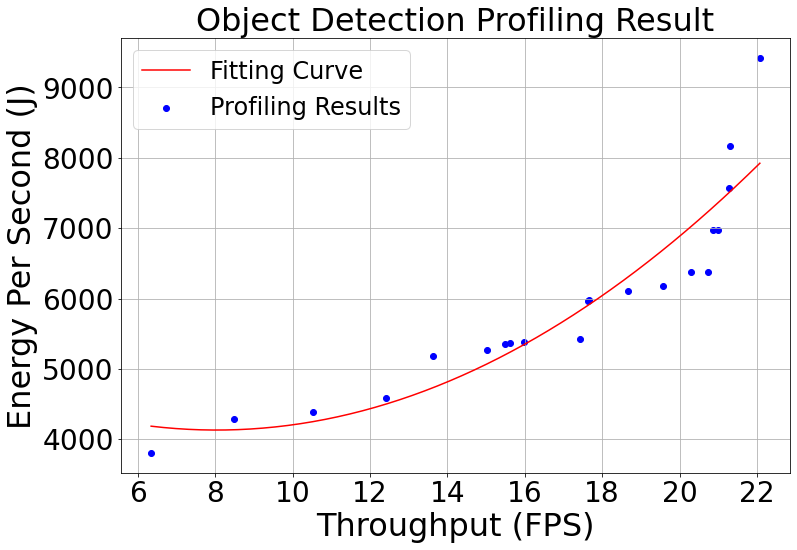

In [204]:
plot_one_fitted_curve(fps_frontier, unit_energy_frontier, 'Throughput (FPS)', 'Energy Per Second (J)', 'Object Detection Profiling Result')

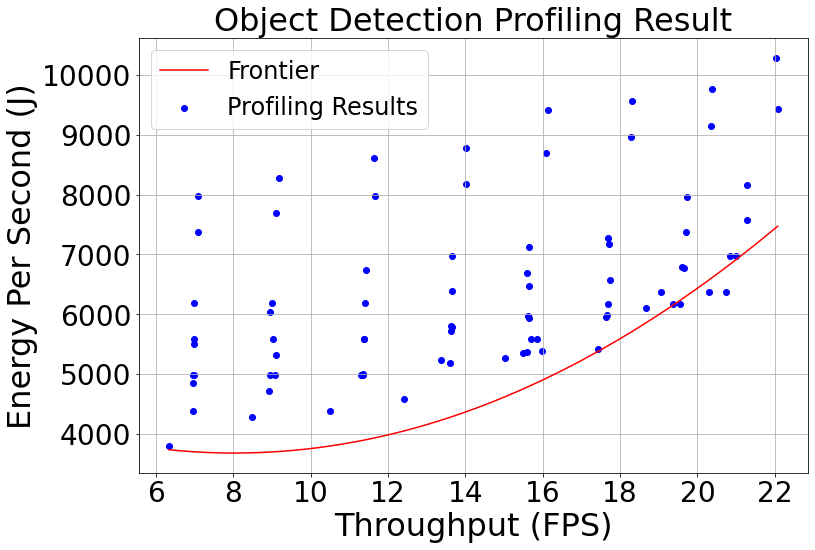

In [205]:
plot_one_fitted_curve_with_points(fps_frontier, unit_energy_frontier, fps_list, total_unit_energy_list, 0.08, 'Throughput (FPS)', 'Energy Per Second (J)', 'Object Detection Profiling Result')